<a href="https://colab.research.google.com/github/carlosdev-ia/pia_curso2526/blob/main/Notebook_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librería Pandas

# Enunciado
El centro quiere analizar los resultados de los alumnos de varios módulos de FP.
Dispones de un archivo CSV llamado "notas.csv" con las siguientes columnas:
| Alumno | Módulo         | Nota |
| ------ | -------------- | ---- |
| Ana    | Programación   | 8.5  |
| Luis   | Programación   | 6.0  |
| Marta  | Bases de Datos | 9.0  |
| Jorge  | Redes          | 5.5  |
| Elena  | Bases de Datos | 7.5  |
| Ana    | Redes          | 6.0  |
| Luis   | Bases de Datos | 8.0  |
| Jorge  | Programación   | 7.0  |

Guarda este contenido en un archivo llamado "notas.csv".

##Ejercicio 1
Lee el archivo "notas.csv" y muestra:
* Las primeras filas
* El número total de registros
* Los módulos distintos que aparecen

In [10]:
import pandas as pd

#Importar archivo
from google.colab import files
uploaded = files.upload()
print()

#Crear dataframe
df = pd.read_csv('notas.csv')

#Las primeras filas
print(df.head())
print()

#El número total de registros
print(f"El número de registros es: {df.shape[0]}")
print()

#Los módulos distintos que aparecen
print(df['Módulo'].unique())


Saving notas.csv to notas (8).csv

  Alumno          Módulo  Nota
0    Ana    Programación   8.5
1   Luis    Programación   6.0
2  Marta  Bases de Datos   9.0
3  Jorge           Redes   5.5
4  Elena  Bases de Datos   7.5

El número de registros es: 8

['Programación' 'Bases de Datos' 'Redes']


## Ejercicio 2
Calcula la nota media de cada alumno (independientemente del módulo)
y muestra los resultados en orden descendente.

In [11]:
print(df.groupby('Alumno')['Nota'].mean().sort_values(ascending=False))

Alumno
Marta    9.00
Elena    7.50
Ana      7.25
Luis     7.00
Jorge    6.25
Name: Nota, dtype: float64


## Ejercicio 3
Muestra la nota media obtenida en cada módulo.

In [13]:
print(df.groupby('Módulo')['Nota'].mean().sort_values(ascending=False))

Módulo
Bases de Datos    8.166667
Programación      7.166667
Redes             5.750000
Name: Nota, dtype: float64


## Ejercicio 4
Crea una nueva columna "Resultado" con el valor:
* "Aprobado" si la nota es ≥ 5
* "Suspenso" si la nota es < 5

In [14]:
df['Resultado'] = df['Nota'].apply(lambda x: 'Aprobado' if x >= 5 else 'Suspenso')
print(df)

  Alumno          Módulo  Nota Resultado
0    Ana    Programación   8.5  Aprobado
1   Luis    Programación   6.0  Aprobado
2  Marta  Bases de Datos   9.0  Aprobado
3  Jorge           Redes   5.5  Aprobado
4  Elena  Bases de Datos   7.5  Aprobado
5    Ana           Redes   6.0  Aprobado
6   Luis  Bases de Datos   8.0  Aprobado
7  Jorge    Programación   7.0  Aprobado


## Ejercicio 5
Muestra cuántos aprobados y suspensos hay en cada módulo.

In [15]:
print(df.groupby(['Módulo', 'Resultado']).size())


Módulo          Resultado
Bases de Datos  Aprobado     3
Programación    Aprobado     3
Redes           Aprobado     2
dtype: int64


##Ejercicio 6
Usando el DataFrame media_alumno, muestra el alumno con la mejor nota media.

In [20]:
media_alumno = df.groupby('Alumno')['Nota'].mean()
print(media_alumno)
print()
print(media_alumno[media_alumno == media_alumno.max()])

Alumno
Ana      7.25
Elena    7.50
Jorge    6.25
Luis     7.00
Marta    9.00
Name: Nota, dtype: float64

Alumno
Marta    9.0
Name: Nota, dtype: float64


##Ejercicio 7
Guarda los resultados de las medias por alumno y por módulo en dos archivos CSV: "media_por_alumno.csv" y "media_por_modulo.csv"

In [ ]:
#crear archivos en /content en el entorno  de coñab

media_alumno.to_csv('media_por_alumno.csv')
media_modulo = df.groupby('Módulo')['Nota'].mean()
media_modulo.to_csv('media_por_modulo.csv')

#Descargalos en el ordenado

from google.colab import files
files.download("media_por_alumno.csv")
files.download("media_por_modulo.csv")


##Ejercicio 8
Realiza un gráfico de barras con las medias por módulo usando **matplotlib**.

Medias por módulo:
Módulo
Bases de Datos    8.166667
Programación      7.166667
Redes             5.750000
Name: Nota, dtype: float64


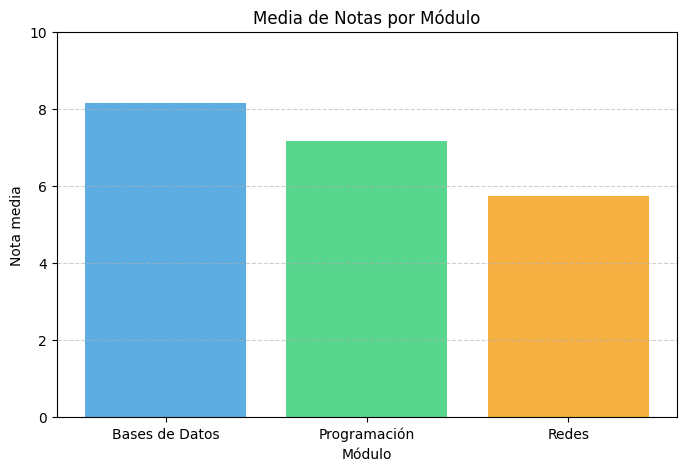

In [21]:
import matplotlib.pyplot as plt

# Calcular la media por módulo
medias = df.groupby('Módulo')['Nota'].mean()

# Mostrar los resultados en consola
print("Medias por módulo:")
print(medias)

# Crear el gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(medias.index, medias.values, color=['#5DADE2', '#58D68D', '#F5B041'])

# Personalizar el gráfico
plt.title("Media de Notas por Módulo")
plt.xlabel("Módulo")
plt.ylabel("Nota media")
plt.ylim(0, 10)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Mostrar el gráfico
plt.show()
